In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline


In [ ]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

/tmp/ipython-input-2487901451.py:8: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.385586,35.250713,26.768006,28.908804,855215656
2007-10-08,30.727665,33.480117,30.534510,33.480117,126671715
2007-10-09,32.820175,33.109906,29.085854,30.743763,116725709
2007-10-10,33.126003,33.802045,32.836272,33.673274,67931378
2007-10-11,36.828133,38.630909,32.836274,38.630909,106320954


In [ ]:
df.shape


(4208, 5)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [ ]:
df.isnull().sum()


,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [ ]:
df.describe()


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.255945,80.286305,78.238144,79.292804,1.188963e+07
std,63.621687,64.365266,62.829875,63.603316,2.061999e+07
min,18.908409,20.212437,16.952367,20.114634,0.000000e+00
25%,36.349706,36.923176,35.812873,36.386937,4.799653e+06
50%,55.232332,55.870059,54.493163,55.338356,8.344398e+06
75%,82.704771,83.691970,81.724074,82.727267,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [ ]:
df = df.reset_index()


In [ ]:
df.columns


MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [ ]:
df.to_csv("powergrid.csv")


In [ ]:
data01 = pd.read_csv("powergrid.csv")


In [ ]:
data01.head()


,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.38558578491211,35.25071281473011,26.768006081918546,28.908803575805525,855215656
2,1,2007-10-08,30.727664947509766,33.48011655616869,30.534509606022688,33.48011655616869,126671715
3,2,2007-10-09,32.82017517089844,33.10990603070133,29.085854182395227,30.743762670622203,116725709
4,3,2007-10-10,33.12600326538086,33.80204486122549,32.83627240041195,33.67327388987095,67931378


In [ ]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [31]:
df = df.drop(['Date'], axis = 1)


/tmp/ipython-input-3534138121.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [32]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.385586,35.250713,26.768006,28.908804,855215656
1,30.727665,33.480117,30.534510,33.480117,126671715
2,32.820175,33.109906,29.085854,30.743763,116725709
3,33.126003,33.802045,32.836272,33.673274,67931378
4,36.828133,38.630909,32.836274,38.630909,106320954


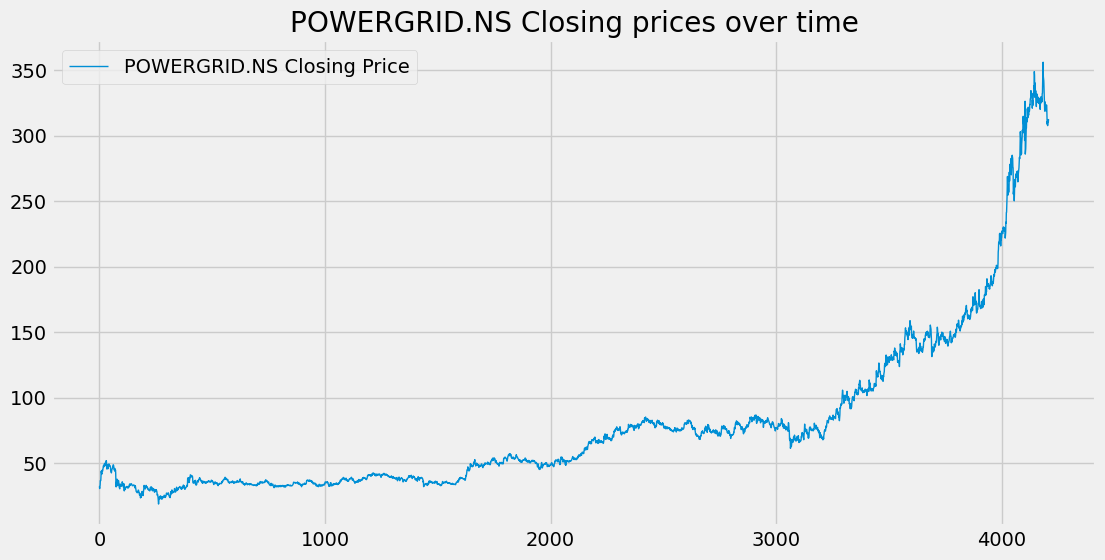

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

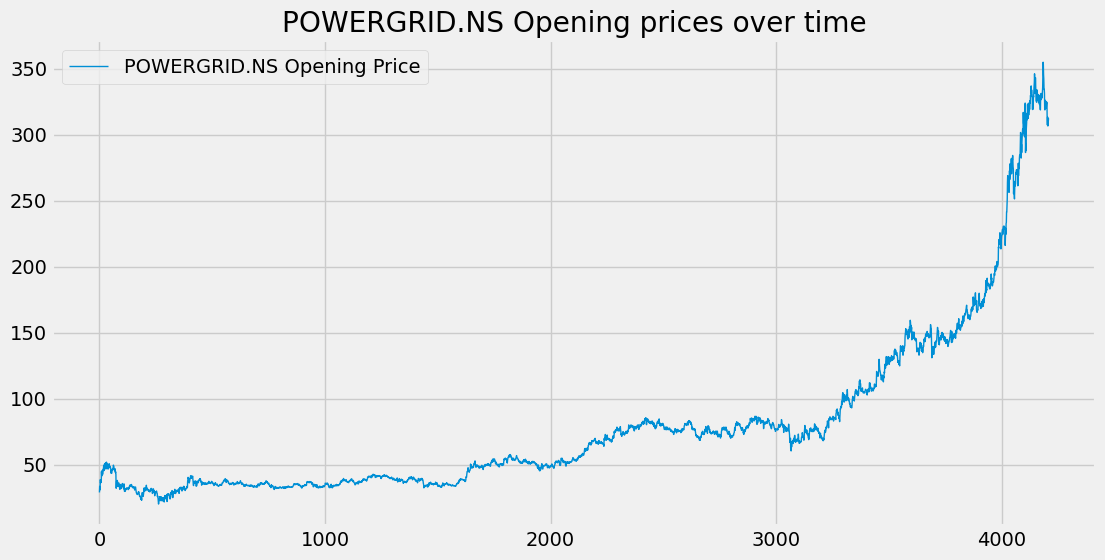

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

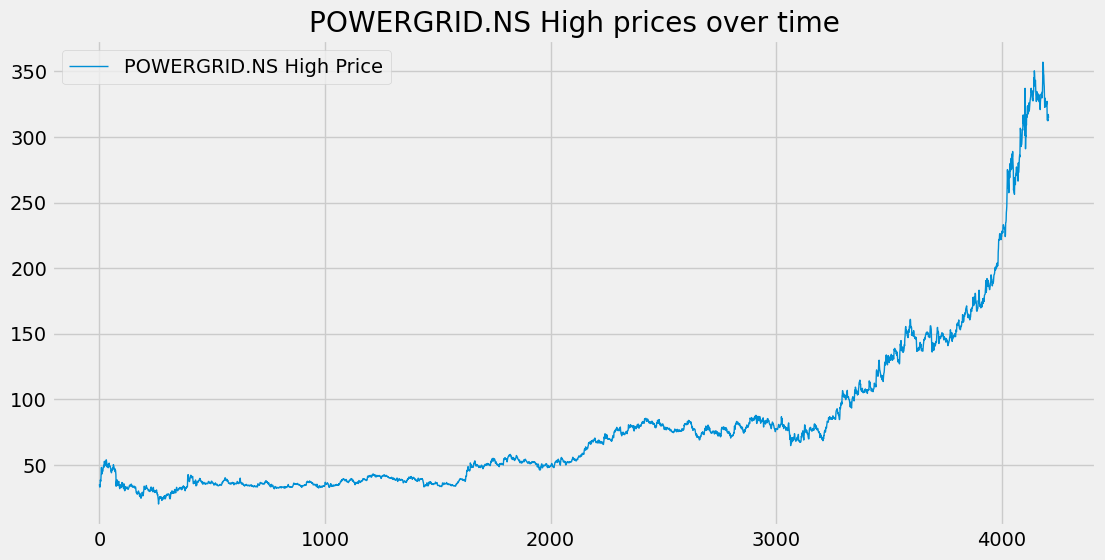

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

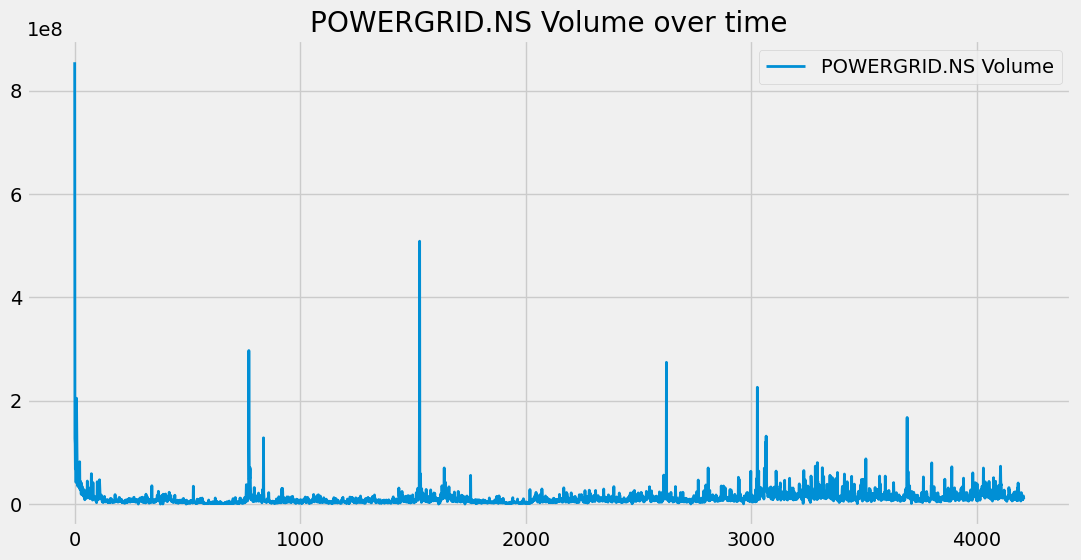

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [37]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [38]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [39]:
df01.rolling(5).mean()


,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [40]:
ma100 = df.Close.rolling(100).mean()


In [41]:
ma100


Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670630


In [42]:
ma200 = df.Close.rolling(200).mean()


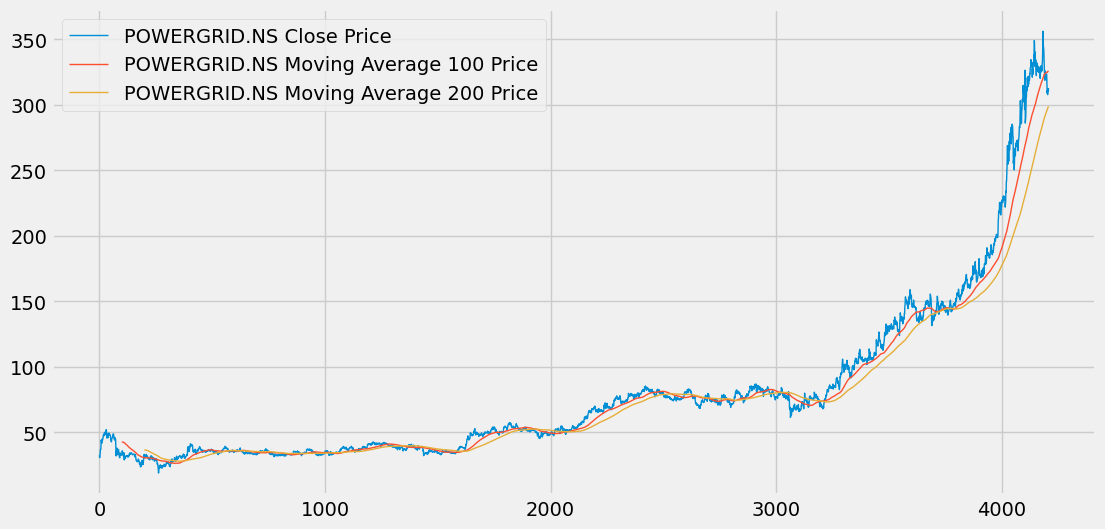

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()


In [44]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()


In [45]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()


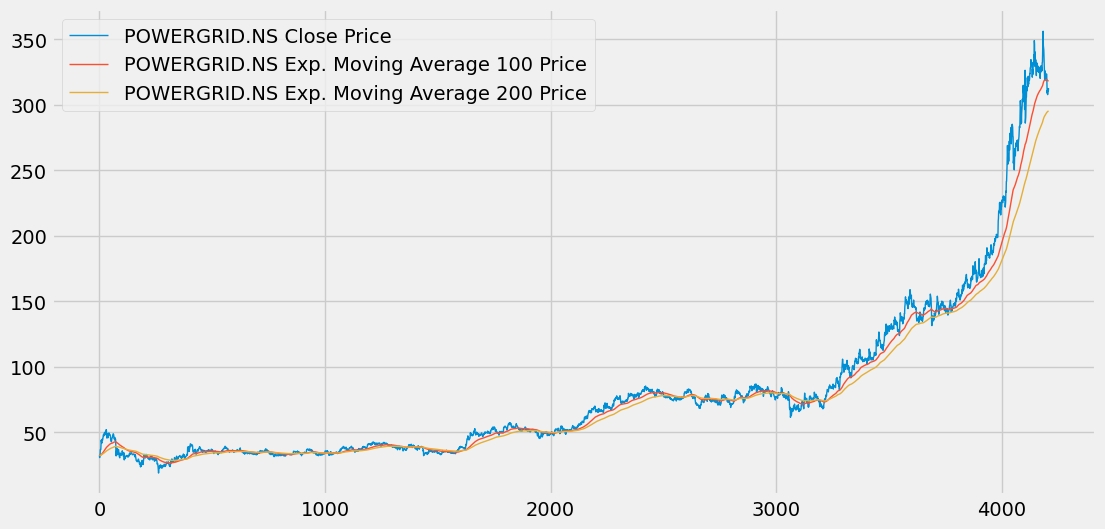

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [47]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [48]:
data_training.shape


(2945, 1)

In [49]:
data_testing.shape


(1263, 1)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [51]:
data_training_array = scaler.fit_transform(data_training)


In [52]:
data_training_array


array([[0.19808614],
       [0.17371819],
       [0.20447369],
       ...,
       [0.90774422],
       [0.86000364],
       [0.87299651]])

In [53]:
data_training_array.shape[0]


2945

In [54]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [55]:
x_train.shape


(2845, 100, 1)

In [56]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [59]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [60]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 37s 317ms/step - loss: 0.0841
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 294ms/step - loss: 0.0083
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - loss: 0.0065
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - loss: 0.0066
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 288ms/step - loss: 0.0064
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 292ms/step - loss: 0.0061
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 295ms/step - loss: 0.0057
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 43s 319ms/step - loss: 0.0054
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 39s 292ms/step - loss: 0.0048
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 295ms/step - loss: 0.0048
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - loss: 0.0045
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 281ms/step - loss: 0.0042
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 291ms/step - loss: 0.0045
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 269ms/step - loss: 0.0038
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 

In [62]:
past_100_days = data_training.tail(100)


In [67]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [68]:
final_df.head()


Ticker,POWERGRID.NS
0,75.731850
1,77.275726
2,77.539803
3,77.377304
4,77.824211


In [69]:
input_data = scaler.fit_transform(final_df)


In [70]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [71]:
x_test.shape


(1263, 100, 1)

In [72]:
y_predicted = model.predict(x_test)


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step


In [73]:
y_predicted.shape


(1263, 1)

In [74]:
scaler.scale_


array([0.00339369])

In [75]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

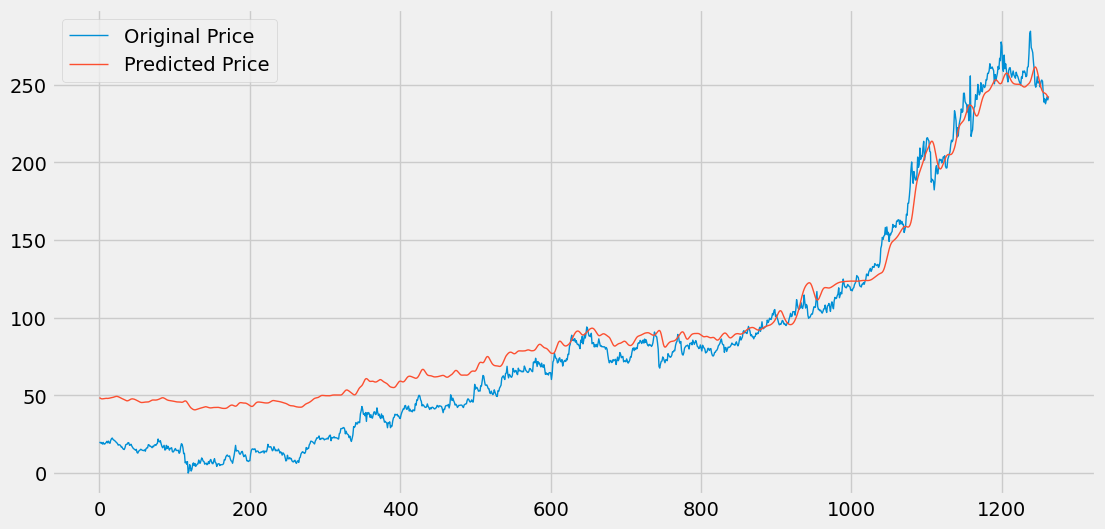

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [77]:
model.save('stock_dl_model.h5')